### Executive Summary

In my cluster analysis I discovered the following:

As combined MPG increases, the CO2 emissions decrease for single fuel vehicles. This makes sense because more fuel efficient cars will generate less CO2 emissions. See 'Cluster Analysis' section for visuals.

* Black: high CO2 emissions, low combined MPG
* Red: low CO2 emissions, high combined MPG
* Tan: low CO2 emissions, low combined MPG

In my regression analysis, the goal is to predict annual fuel cost based on CO2 emissions and the fuel type of single fuel vehicles. I discovered that these two factors did have an impact on annual fuel costs. See 'Regression Analysis' section for more details.

Fields created from feature engineering:
* year_range based on car model years
* fuelCode based on traditional fuels (all the gasoline types and diesel) vs alternative fuels (electric, natural gas)
* used get_dummies to create fuelType1 binary variables for the regression analysis

Some things I tried but didnt work out:
* Tried fuel ecomnomy score as dependent variable but too many fields had a value of -1 (N/A). Dropping that column resulted in almost 80% data loss. 
* Tried to use combined MPG as a predictor for annual fuel costs but it mathematically makes it up since city MPG is included in combined MPG

### Preliminary Analysis

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.warnings.filterwarnings('ignore')
sns.set()

df = pd.read_csv('/Users/drewmcknight1/Desktop/MISY630/Fall 2020 Course Files/Assignments/cars.csv')
df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [2]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
barrels08,41342.0,17.273710,4.621490,0.06,14.330870,16.48050,19.388824,47.087143
barrelsA08,41342.0,0.220596,1.141429,0.00,0.000000,0.00000,0.000000,18.311667
charge120,41342.0,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000
charge240,41342.0,0.045526,0.608984,0.00,0.000000,0.00000,0.000000,13.000000
city08,41342.0,18.382565,7.926209,6.00,15.000000,17.00000,21.000000,150.000000
city08U,41342.0,6.051678,11.689269,0.00,0.000000,0.00000,14.208100,150.000000
cityA08,41342.0,0.667505,5.239748,0.00,0.000000,0.00000,0.000000,145.000000
cityA08U,41342.0,0.522278,5.089573,0.00,0.000000,0.00000,0.000000,145.083500
cityCD,41342.0,0.000459,0.038681,0.00,0.000000,0.00000,0.000000,5.350000
cityE,41342.0,0.324528,3.794382,0.00,0.000000,0.00000,0.000000,122.000000


In [3]:
df.isnull().sum()

barrels08              0
barrelsA08             0
charge120              0
charge240              0
city08                 0
city08U                0
cityA08                0
cityA08U               0
cityCD                 0
cityE                  0
cityUF                 0
co2                    0
co2A                   0
co2TailpipeAGpm        0
co2TailpipeGpm         0
comb08                 0
comb08U                0
combA08                0
combA08U               0
combE                  0
combinedCD             0
combinedUF             0
cylinders            209
displ                207
drive               1189
engId                  0
eng_dscr           16192
feScore                0
fuelCost08             0
fuelCostA08            0
                   ...  
rangeCity              0
rangeCityA             0
rangeHwy               0
rangeHwyA              0
trany                 11
UCity                  0
UCityA                 0
UHighway               0
UHighwayA              0


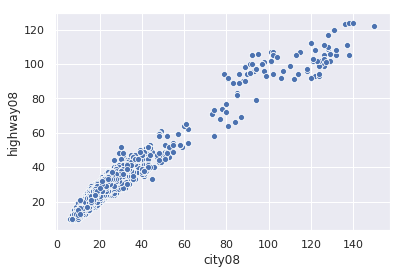

In [4]:
sns.scatterplot(x='city08', y='highway08', data=df)

The above indicates a very close relationship between city MPG and highway MPG for single fuel vehicles.

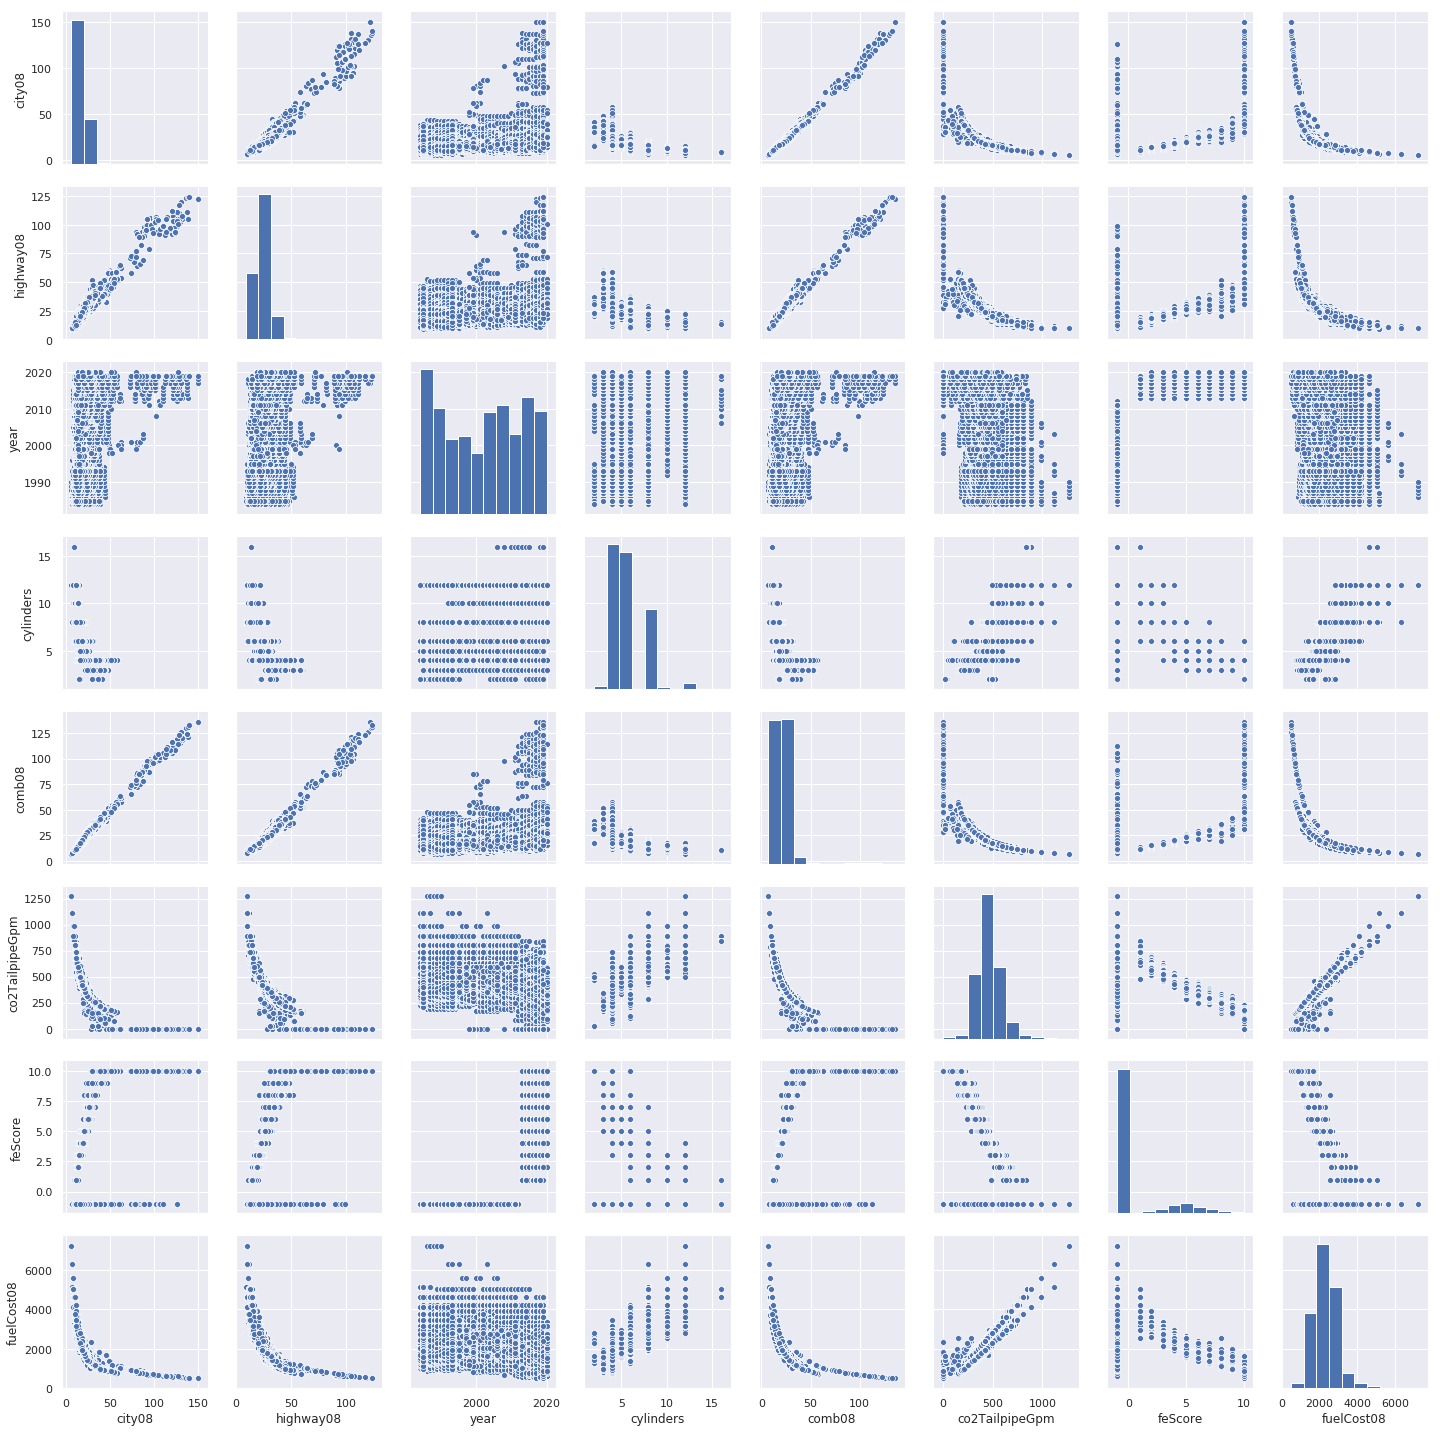

In [5]:
sns.pairplot(df[['city08', 'highway08', 'year', 'cylinders',
       'comb08', 'co2TailpipeGpm', 'feScore', 'fuelCost08']], height=2.5)

In [6]:
df2 = df[['year', 'fuelCost08']].copy()

df2.loc[(df2.year >= 1980) & (df2.year <= 1989), 'year_range'] = '1980s'
df2.loc[(df2.year >= 1990) & (df2.year <= 1999), 'year_range'] = '1990s'
df2.loc[(df2.year >= 2000) & (df2.year <= 2009), 'year_range'] = '2000s'
df2.loc[(df2.year >= 2010) & (df2.year <= 2019), 'year_range'] = '2010s'
df2.loc[df2.year >= 2020, 'year_range'] = '2020s'

Feature engineered year_range based on year of the cars

In [7]:
df2['fuelCost08'].groupby(df2['year_range']).mean()

year_range
1980s    2311.624033
1990s    2390.984120
2000s    2443.681396
2010s    2137.137401
2020s    2056.892231
Name: fuelCost08, dtype: float64

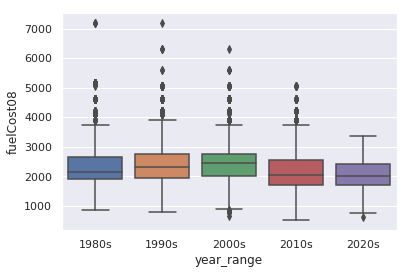

In [8]:
sns.boxplot(x='year_range', y='fuelCost08', data=df2)

We can see from the above boxplot, there are many outliers in terms of annual fuel cost. Interestingly, the older the car, the more outliers appear to be present, which makes sense as older cars are not as fuel efficient as newer cars thus producing higher fuel costs.

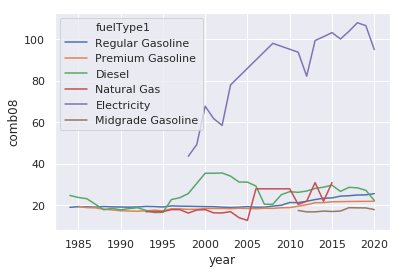

In [9]:
sns.lineplot(x='year', y='comb08', hue='fuelType1', data=df, ci=None)

Above shows change in combined MPG over time (based on model year) for single fuel vehicles. Electric vehicles have shown signifcant improvement in combined MPG relative to the other fuel types since being included in this dataset in the late 90s. 

### Cluster Analysis

In [10]:
df.shape

(41342, 83)

In [11]:
cars = df[['comb08', 'co2TailpipeGpm']].copy()
cars = cars.dropna()
cars.shape

(41342, 2)

In [12]:
cars.head()

,comb08,co2TailpipeGpm
0,21,423.190476
1,11,807.909091
2,27,329.148148
3,11,807.909091
4,19,467.736842


In [13]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale, StandardScaler

scaler = StandardScaler()

scaler.fit(cars)
scaled_array = scaler.transform(cars)

print(cars.describe())
average = np.mean(scaled_array[:,0])
std = np.std(scaled_array[:,0])
print('\ncombined MPG mean is {:.6f}.'.format(average))
print('combined MPG std is {:.6f}.'.format(std))
print('Tailpipe CO2 emissions mean is {:.6f}.'.format(np.mean(scaled_array[:,1])))
print('Tailpipe CO2 emissions standard deviation is {:.6f}.'.format(np.std(scaled_array[:,1])))

             comb08  co2TailpipeGpm
count  41342.000000    41342.000000
mean      20.630908      466.085361
std        7.692512      123.581028
min        7.000000        0.000000
25%       17.000000      386.391304
50%       20.000000      444.350000
75%       23.000000      522.764706
max      136.000000     1269.571429

combined MPG mean is -0.000000.
combined MPG std is 1.000000.
Tailpipe CO2 emissions mean is -0.000000.
Tailpipe CO2 emissions standard deviation is 1.000000.


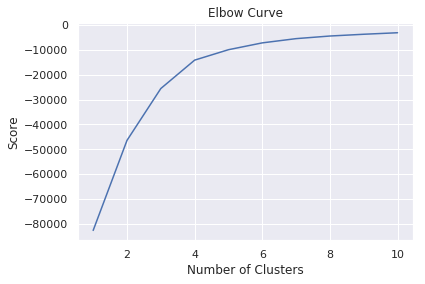

In [14]:
cars2 = scaled_array
max_clusters = 10 # max number of cluster to display in elbow curve

noClusters = range(1, max_clusters + 1)
kmeans = [KMeans(n_clusters = i) for i in noClusters] 
score = [kmeans[i].fit(cars2).score(cars2) for i in range(len(kmeans))]
plt.plot(noClusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel("Score")
plt.title('Elbow Curve')
plt.show()

The elbow curve above shows that 3 clusters is the optimal number we should use for analysis.

In [15]:
kmeans = KMeans(n_clusters = 3, \
            random_state = 42)
kmeans = kmeans.fit(scaled_array) 

unscaled = scaler.inverse_transform(kmeans.cluster_centers_)
unscaled

array([[1.56220654e+01, 5.82720251e+02],
       [1.01145833e+02, 6.25277607e-13],
       [2.33383924e+01, 3.92092221e+02]])

In [16]:
centroids = pd.DataFrame({'centroidx':unscaled[:,0],\
            'centroidy':unscaled[:,1]})

cars['label'] = kmeans.labels_.astype(np.int)
cars.head()

,comb08,co2TailpipeGpm,label
0,21,423.190476,2
1,11,807.909091,0
2,27,329.148148,2
3,11,807.909091,0
4,19,467.736842,2


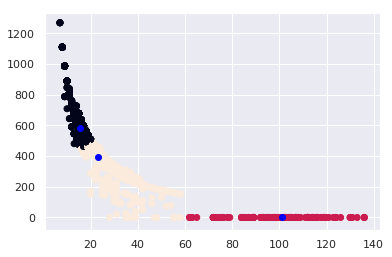

In [17]:
plt.scatter(cars['comb08'], cars['co2TailpipeGpm'], c=cars.label) # (x,y,color)
plt.scatter(centroids['centroidx'], \
            centroids['centroidy'], c='blue') # (x,y,color)

plt.show()

The above indicates as combined MPG increases, the CO2 emissions decrease for single fuel vehicles. This makes sense because more fuel efficient cars will generate less CO2 emissions.

* Black: high CO2 emissions, low combined MPG
* Red: low CO2 emissions, high combined MPG
* Tan: low CO2 emissions, low combined MPG

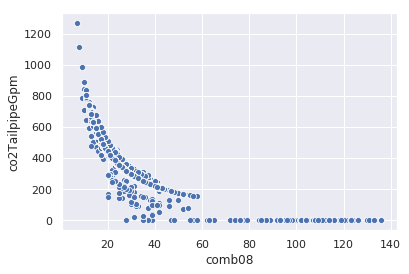

In [18]:
sns.scatterplot(x='comb08', y='co2TailpipeGpm', data=cars)

### Regression Analysis

In [19]:
cars = df[['co2TailpipeGpm', 'fuelCost08', 'fuelType1']].copy()
cars = cars.dropna()
cars.shape

(41342, 3)

In [20]:
cars.loc[(cars.fuelType1 == 'Regular Gasoline') | (cars.fuelType1 == 'Premium Gasoline') | (cars.fuelType1 == 'Diesel')
         | (cars.fuelType1 == 'Midgrade Gasoline'), 'fuelCode'] = 1 # traditional fuel
cars.loc[(cars.fuelType1 == 'Electricity') | (cars.fuelType1 == 'Natural Gas'), 'fuelCode'] = 0 # alternative fuel
cars.head()

,co2TailpipeGpm,fuelCost08,fuelType1,fuelCode
0,423.190476,1950,Regular Gasoline,1.0
1,807.909091,3750,Regular Gasoline,1.0
2,329.148148,1550,Regular Gasoline,1.0
3,807.909091,3750,Regular Gasoline,1.0
4,467.736842,2650,Premium Gasoline,1.0


In [21]:
cars.fuelCode.value_counts()

1.0    41076
0.0      266
Name: fuelCode, dtype: int64

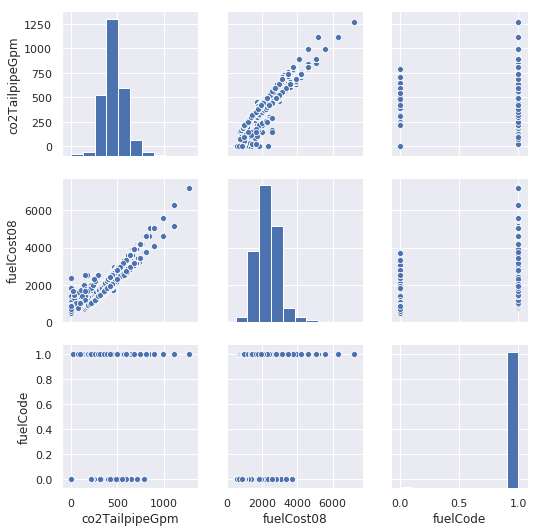

In [22]:
sns.pairplot(cars[['co2TailpipeGpm', 'fuelCost08', 'fuelCode']])

In [23]:
cars.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
co2TailpipeGpm,41342.0,466.085361,123.581028,0.0,386.391304,444.35,522.764706,1269.571429
fuelCost08,41342.0,2309.645155,636.128013,500.0,1900.000000,2300.00,2650.000000,7200.000000
fuelCode,41342.0,0.993566,0.079956,0.0,1.000000,1.00,1.000000,1.000000


In [24]:
X = cars['co2TailpipeGpm'].copy()
Y = cars['fuelCost08'].copy()

In [25]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
X = sm.add_constant(X)
est = sm.OLS(Y,X).fit()
predictions = est.predict()
print(est.summary())
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:             fuelCost08   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                 2.501e+05
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:02:00   Log-Likelihood:            -2.8517e+05
No. Observations:               41342   AIC:                         5.703e+05
Df Residuals:                   41340   BIC:                         5.704e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             87.1687      4.598     18.

The goal is understand if CO2 emissions is a good predictor of annual fuel costs.

* According to the Prob (F-statistic), we have a linear model since it is less than 0.05
* The value of 0.858 for R^2 suggests that CO2 emissions is a strong predictor of annual fuel costs
* The average error level indicates on average, this model is 239.60 grams/mile of CO2 emissions off.
* the high t value also suggests CO2 emissions is a strong predictor

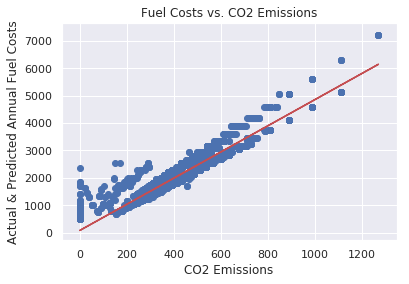

In [26]:
plt.ylabel('Actual & Predicted Annual Fuel Costs')
plt.xlabel('CO2 Emissions')
plt.title('Fuel Costs vs. CO2 Emissions')
plt.plot(X['co2TailpipeGpm'], predictions, c='r')
plt.scatter(X['co2TailpipeGpm'], Y)
plt.show()

In [27]:
cars2 = df[['co2TailpipeGpm', 'fuelCost08', 'fuelType1']].copy()
cars2.fuelType1.value_counts()

Regular Gasoline     27927
Premium Gasoline     11850
Diesel                1189
Electricity            206
Midgrade Gasoline      110
Natural Gas             60
Name: fuelType1, dtype: int64

In [28]:
cars2 = pd.get_dummies(cars2) #featured engineered
cars2.head()

,co2TailpipeGpm,fuelCost08,fuelType1_Diesel,fuelType1_Electricity,fuelType1_Midgrade Gasoline,fuelType1_Natural Gas,fuelType1_Premium Gasoline,fuelType1_Regular Gasoline
0,423.190476,1950,0,0,0,0,0,1
1,807.909091,3750,0,0,0,0,0,1
2,329.148148,1550,0,0,0,0,0,1
3,807.909091,3750,0,0,0,0,0,1
4,467.736842,2650,0,0,0,0,1,0


In [29]:
X = cars2[['fuelType1_Diesel', 'fuelType1_Electricity', 'fuelType1_Midgrade Gasoline', 'fuelType1_Natural Gas', 'fuelType1_Premium Gasoline',
        'fuelType1_Regular Gasoline', 'co2TailpipeGpm']].copy()
Y = cars2['fuelCost08'].copy()

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, \
        test_size = 0.2, random_state = 0)

In [31]:
from sklearn.metrics import mean_squared_error

X_train = sm.add_constant(X_train) # required if constant expected
est = sm.OLS(y_train,X_train).fit() # fit model
predictions = est.predict() # get predicted values
print(est.summary()) # prints full regression results
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:             fuelCost08   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 4.671e+05
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:02:01   Log-Likelihood:            -1.8678e+05
No. Observations:               33073   AIC:                         3.736e+05
Df Residuals:                   33066   BIC:                         3.736e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [32]:
X_test = sm.add_constant(X_test) # required if constant expected
est = sm.OLS(y_test,X_test).fit() # fit model
predictions = est.predict() # get predicted values
print(est.summary()) # prints full regression results
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:             fuelCost08   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.046e+05
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:02:01   Log-Likelihood:                -47190.
No. Observations:                8269   AIC:                         9.439e+04
Df Residuals:                    8262   BIC:                         9.444e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

Goal: Determine if fuel type and CO2 emissions are good predictors of annual fuel cost

* According to the Prob (F-statistic), we have a linear model since it is less than 0.05
* The value of 0.988 (train) and 0.987 (test) for R^2 suggests that CO2 emissions and fuel type are strong predictors of annual fuel costs
* the high abs(t) values also suggests CO2 emissions and fuel types are strong predictors
* Adjusted R^2 and R^2 are the same so the model fits just right
* the low average error suggests that this model has a high accuracy
* the similarity in the train/test data suggests this model is generalizable.

In [33]:
variables = est.model.exog # get model features
vif = pd.DataFrame() # create a dataframe
vif["VIF Factor"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["features"] = X_test.columns
print('VIF: {}'.format(vif))

VIF:    VIF Factor                     features
0    0.000000                        const
1         inf             fuelType1_Diesel
2         inf        fuelType1_Electricity
3         inf  fuelType1_Midgrade Gasoline
4         inf        fuelType1_Natural Gas
5         inf   fuelType1_Premium Gasoline
6         inf   fuelType1_Regular Gasoline
7    1.082642               co2TailpipeGpm


In [34]:
corr = X_test.corr()
corr.style.background_gradient()

,const,fuelType1_Diesel,fuelType1_Electricity,fuelType1_Midgrade Gasoline,fuelType1_Natural Gas,fuelType1_Premium Gasoline,fuelType1_Regular Gasoline,co2TailpipeGpm
const,nan,nan,nan,nan,nan,nan,nan,nan
fuelType1_Diesel,nan,1,-0.0126454,-0.00712001,-0.00631006,-0.108486,-0.252107,-0.0258481
fuelType1_Electricity,nan,-0.0126454,1,-0.00301206,-0.00266942,-0.0458942,-0.106652,-0.27425
fuelType1_Midgrade Gasoline,nan,-0.00712001,-0.00301206,1,-0.00150302,-0.0258407,-0.0600503,0.00502325
fuelType1_Natural Gas,nan,-0.00631006,-0.00266942,-0.00150302,1,-0.0229012,-0.0532192,-0.0201917
fuelType1_Premium Gasoline,nan,-0.108486,-0.0458942,-0.0258407,-0.0229012,1,-0.914975,0.024206
fuelType1_Regular Gasoline,nan,-0.252107,-0.106652,-0.0600503,-0.0532192,-0.914975,1,0.0298501
co2TailpipeGpm,nan,-0.0258481,-0.27425,0.00502325,-0.0201917,0.024206,0.0298501,1


There are no high values, and the high VIF is likely resulting from the binaries. High VIFs for dummy variables representing nominal variables with three or more categories are usually not a problem.

